# FASHION MNIST USING LOGISTIC REGRESSION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('fashion-mnist_test.csv')
dft=pd.read_csv('fashion-mnist_train.csv')
vt=dft.values
v=df.values
X_test = vt[:,1:]
y_test = vt[:,0]

In [5]:
y=v[:,0]
x=v[:,1:]
print(y.shape)
print(x.shape)

(10000,)
(10000, 784)


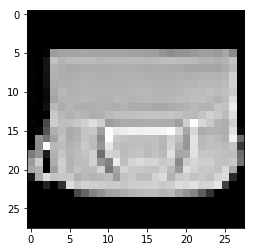

8


In [6]:
#Visualise SOme Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(x[14])
print(y[14])

In [7]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:

model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
### score for one vs rest
model.score(X_test, y_test)

0.76871666666666671

In [10]:
model.predict(X_test)

array([6, 9, 6, ..., 8, 8, 7], dtype=int64)

In [11]:
model.predict(X_test[:5,:])

array([6, 9, 6, 2, 3], dtype=int64)

In [12]:
y_test[:5]

array([2, 9, 6, 0, 3], dtype=int64)

# FASHION MNIST USING KNN from scratch


In [13]:

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [15]:
pred = knn(x,y,X_test[1])

print(int(pred))

9


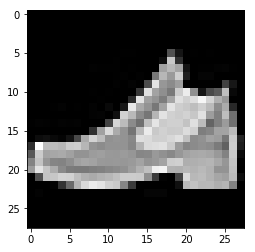

9


In [16]:
drawImg(X_test[1])
print(y_test[1])